In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import tensorflow as tf
from sklearn.model_selection import RepeatedKFold
plt.rcParams["figure.figsize"] = (10,7)

In [4]:
data = pd.read_csv("/content/dataset1.csv")
print(data.head())

   Year  Day  Hour  Kp index   R  DST index  ap index  f10.7 index
0  2021    1     0         0  24         -1         0         77.7
1  2021    1     1         0  24         -2         0         77.7
2  2021    1     2         0  24         -2         0         77.7
3  2021    1     3         3  24         -4         2         77.7
4  2021    1     4         3  24         -4         2         77.7


In [5]:
xpoints = data.iloc[::,1]
ypoints = data.iloc[::,7]
print(xpoints,ypoints)

0         1
1         1
2         1
3         1
4         1
       ... 
4329    182
4330    182
4331    182
4332    182
4333    182
Name: Day, Length: 4334, dtype: int64 0       77.7
1       77.7
2       77.7
3       77.7
4       77.7
        ... 
4329    97.2
4330    97.2
4331    97.2
4332    97.2
4333    97.2
Name: f10.7 index, Length: 4334, dtype: float64


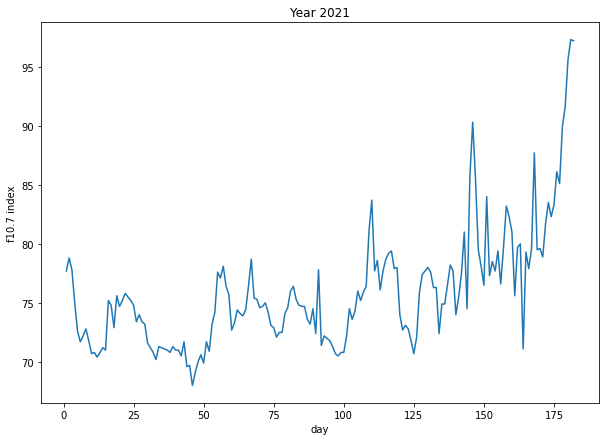

In [6]:
plt.plot(xpoints,ypoints)
plt.xlabel("day")
plt.ylabel("f10.7 index")
plt.title("Year 2021")
plt.show()


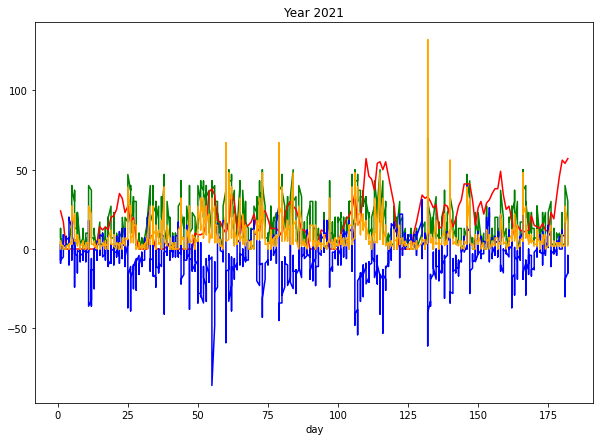

In [7]:
plt.plot(xpoints,data.iloc[::,3],color="green")
plt.plot(xpoints,data.iloc[::,4],color="red")
plt.plot(xpoints,data.iloc[::,5],color="blue")
plt.plot(xpoints,data.iloc[::,6],color="orange")
plt.xlabel("day")
plt.title("Year 2021")
plt.show()

In [8]:
X = data.iloc[::,3:7]
y = data.iloc[::,7]

In [9]:
#split the data train 75% : test 25%
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [11]:
#define model
model = LassoCV(alphas=np.arange(0.1, 1, 0.01), cv=cv, n_jobs=-1)

In [12]:
#fit model
model.fit(X_train, y_train)

LassoCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [13]:
print(model.alpha_)

0.14999999999999997


In [14]:
res = model.predict(X_test)

In [15]:
print(res)

[74.7178262  72.23277539 74.28279058 ... 72.42640688 77.43127844
 84.31008231]


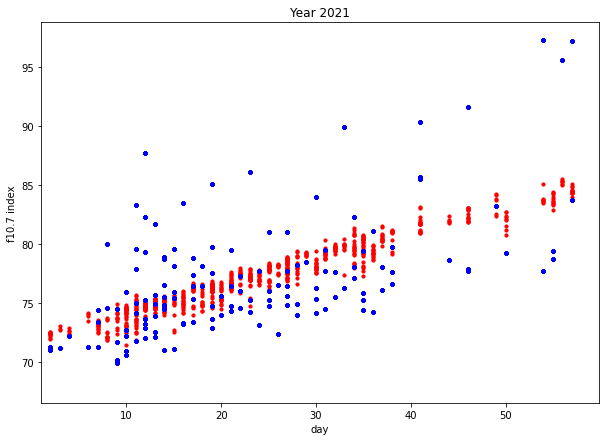

In [16]:
plt.scatter(X_test.iloc[::,1],res,s=10,c='red')
plt.scatter(X_train.iloc[::,1],y_train,s=10,c='blue')
plt.xlim(left=1),
plt.xlabel("day")
plt.ylabel("f10.7 index")
plt.title("Year 2021")
plt.show()

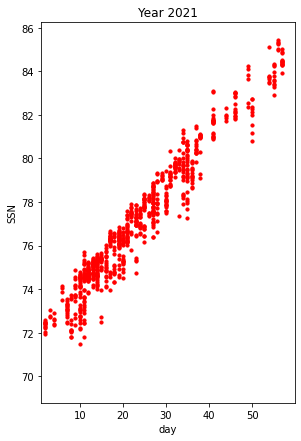

In [17]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(1,2,1)
plt.scatter(X_test.iloc[::,1],res,s=10,c='red')
#plt.plot(X_test.iloc[::,1],res,c='red')
plt.xlim(left=1)

plt.xlabel("day")
plt.ylabel("f10.7 index")
plt.title("Year 2021")


#plt.subplot(1,2,2)
#plt.scatter(X_train.iloc[::,1],y_train,s=10,c='blue')

plt.xlabel("day")
plt.ylabel("SSN")
plt.title("Year 2021")
plt.show()

#phase2

In [18]:
#import data
Data = pd.read_csv("./dataset2.csv")

In [19]:
#Data.head()

In [20]:
#finding missing values
Data.isna().sum()

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

In [21]:
#creating data points
tec = Data['Monthly Mean Total Sunspot Number']
series = np.array(tec)
time = np.arange(0, 3252)
seriesind = res

In [22]:
# The function to plot series data
def plotter(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("days")
    plt.ylabel("tec index")
    plt.grid(True)

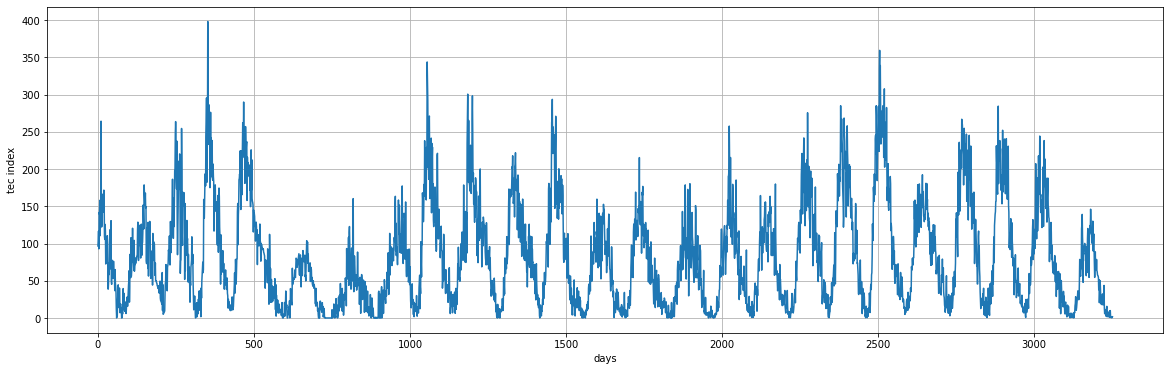

In [23]:
# Plotting the data to have a 'first look'
plt.figure(figsize = (20, 6))
plotter(time, series)

In [24]:
# Defining the parameters
window_size = 100
batch_size = 256
shuffle_buffer_size = 1000

In [25]:
# Windowing the dataset
def train_data_pipeline(series, window_size, batch_size, shuffle_buffer_size):
    series = tf.expand_dims(series, axis=-1)
    data = tf.data.Dataset.from_tensor_slices(series)
    data = data.window(window_size+1, shift=1, drop_remainder=True)
    data = data.flat_map(lambda w: w.batch(batch_size))
    data = data.shuffle(shuffle_buffer_size)
    data = data.map(lambda w: (w[:-1], w[1:]))
    return data.batch(batch_size).prefetch(1)
    
train = train_data_pipeline(series, window_size, batch_size, shuffle_buffer_size)

In [26]:
# The model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

In [ ]:
# Compiling and Training the Model
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam', metrics=["mae"])
history = model.fit(train, epochs=300, verbose=1)

Epoch 1/300
13/13 [==============================] - 27s 2s/step - loss: 24.8286 - mae: 25.3213
Epoch 2/300
13/13 [==============================] - 12s 856ms/step - loss: 17.6606 - mae: 18.1519
Epoch 3/300
13/13 [==============================] - 12s 858ms/step - loss: 16.0063 - mae: 16.4967
Epoch 4/300
13/13 [==============================] - 12s 874ms/step - loss: 14.8362 - mae: 15.3250
Epoch 5/300
13/13 [==============================] - 12s 878ms/step - loss: 14.2035 - mae: 14.6908
Epoch 6/300
13/13 [==============================] - 13s 955ms/step - loss: 13.6159 - mae: 14.1015
Epoch 7/300
13/13 [==============================] - 12s 874ms/step - loss: 13.1450 - mae: 13.6296
Epoch 8/300
13/13 [==============================] - 12s 876ms/step - loss: 12.8797 - mae: 13.3639
Epoch 9/300
13/13 [==============================] - 12s 868ms/step - loss: 12.5368 - mae: 13.0212
Epoch 10/300
13/13 [==============================] - 13s 967ms/step - loss: 12.1920 - mae: 12.6755
Epoch 11/300

In [ ]:
# Plotting loss values
plt.plot(history.history['loss'][30:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plotting mae values
plt.plot(history.history['mae'][30:])
plt.title('Model Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Windowing the data for testing based on cycles
def test_data_pipeline(series):
    series = tf.expand_dims(series, axis=-1)
    data = tf.data.Dataset.from_tensor_slices(series)
    data = data.window(window_size, shift=1, drop_remainder=True)
    data = data.flat_map(lambda w: w.batch(window_size))
    data = data.batch(batch_size).prefetch(1)
    return data

In [ ]:
# Predicting/forecast
test = test_data_pipeline(series)
forecast = model.predict(test)
forecast = forecast[:, -1, 0]

In [ ]:
# Forecasting tec using the trained model
time_valid = time[window_size+1:]
series_ori = series[window_size+1:]
forecast = np.reshape(forecast, (-1))
forecast = forecast[:-1]
plt.figure(figsize=(20, 6))
plotter(time_valid[2000:2500], series_ori[2000:2500])
plotter(time_valid[2000:2500], forecast[2000:2500])